In [2]:
import os

def rename_images(directory, start_number=0):
    """
    Renames images in a given directory with zero-padded sequential numbers, 
    starting from `start_number`, while preserving file extensions.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return
    
    # Get a sorted list of files (excluding directories)
    files = sorted(f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)))

    # Rename each file
    for i, filename in enumerate(files, start=start_number):
        # Extract the file extension
        _, ext = os.path.splitext(filename)

        # Create the new filename with 10-digit zero padding
        new_filename = f"{i:010d}{ext}"

        # Construct full old and new paths
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_filename)

        try:
            os.rename(old_path, new_path)
            print(f"Renamed '{filename}' -> '{new_filename}'")
        except Exception as e:
            print(f"Error renaming '{filename}': {e}")

    print(f"Renaming complete in {directory}.\n")


# Define dataset base directory
base_directory = r'C:\Users\janmi\PycharmProjects\Magisterka\yolov5\data\images'

# Define subdirectories to process
subdirs = ['']

# Set starting value (modify as needed)
starting_value = 946  # Change this value to start numbering from a specific number

# Process each subdirectory
for subdir in subdirs:
    rename_images(os.path.join(base_directory, subdir), start_number=starting_value)


Renamed '0000000000.png' -> '0000000946.png'
Renamed '0000000001.png' -> '0000000947.png'
Renamed '0000000002.png' -> '0000000948.png'
Renamed '0000000003.png' -> '0000000949.png'
Renamed '0000000004.png' -> '0000000950.png'
Renamed '0000000005.png' -> '0000000951.png'
Renamed '0000000006.png' -> '0000000952.png'
Renamed '0000000007.png' -> '0000000953.png'
Renamed '0000000008.png' -> '0000000954.png'
Renamed '0000000009.png' -> '0000000955.png'
Renamed '0000000010.png' -> '0000000956.png'
Renamed '0000000011.png' -> '0000000957.png'
Renamed '0000000012.png' -> '0000000958.png'
Renamed '0000000013.png' -> '0000000959.png'
Renamed '0000000014.png' -> '0000000960.png'
Renamed '0000000015.png' -> '0000000961.png'
Renamed '0000000016.png' -> '0000000962.png'
Renamed '0000000017.png' -> '0000000963.png'
Renamed '0000000018.png' -> '0000000964.png'
Renamed '0000000019.png' -> '0000000965.png'
Renamed '0000000020.png' -> '0000000966.png'
Renamed '0000000021.png' -> '0000000967.png'
Renamed '0

In [11]:
import os
from PIL import Image

# Path to the directory containing the images
directory = r'C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\validation\night'

# Desired size
new_size = (1392, 512)

# Starting index for renaming
start_index = 0

# Get a list of all files in the directory
files = sorted(os.listdir(directory))

# Check if the number of files is correct
for idx, filename in enumerate(files):
    # Full path to the original file
    old_file = os.path.join(directory, filename)
    
    # Check if the file is a jpg
    if filename.lower().endswith('.jpg'):
        # Open the image
        with Image.open(old_file) as img:
            # Resize the image
            img = img.resize(new_size, Image.LANCZOS)
            
            # Construct the new filename with 10 digits and .png extension
            new_filename = f"{start_index + idx:010d}.png"
            
            # Full path to the new file
            new_file = os.path.join(directory, new_filename)
            
            # Save the image as PNG
            img.save(new_file, 'PNG')
            
print("Image resizing and format conversion completed successfully.")


Image resizing and format conversion completed successfully.


In [16]:
from PIL import Image
import os

input_folder = r"C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day"
output_folder = r"C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day"

for filename in os.listdir(input_folder):
    if filename.endswith(".ppm"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename.replace(".ppm", ".png"))
        
        with Image.open(input_path) as img:
            img.save(output_path, "PNG")
        
        print(f"Converted {input_path} to {output_path}")

Converted C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00000.ppm to C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00000.png
Converted C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00001.ppm to C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00001.png
Converted C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00002.ppm to C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00002.png
Converted C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00003.ppm to C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00003.png
Converted C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day\00004.ppm to C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm  # Library with many state-of-the-art pretrained models
from tqdm import tqdm  # For progress bars

# ---------------------------
# Device Setup: Use CUDA if available
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.device_count() > 1:
    print(f"Found {torch.cuda.device_count()} GPUs. Using DataParallel.")

# ---------------------------
# Data Preparation
# ---------------------------
train_dir = r'C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\train'          # Update with your training directory path
val_dir   = r'C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\validation'     # Update with your validation directory path

# Data augmentation and normalization for training; only normalization for validation.
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # ImageNet means
                         std=[0.229, 0.224, 0.225])    # ImageNet stds
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create datasets using ImageFolder which expects folders named by class
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_dir, transform=val_transforms)

# Create DataLoaders for batching and shuffling data
batch_size = 32
num_workers = 4  # Adjust based on your system

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# ---------------------------
# Model Setup: Using timm to load EfficientNet-B3
# ---------------------------
# timm.create_model automatically downloads and initializes the model with pretrained weights.
# We specify num_classes=2 for our binary (day vs. night) classification.
model = timm.create_model("efficientnet_b3", pretrained=True, num_classes=2)
model = model.to(device)

# Wrap the model for multi-GPU training if available
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# ---------------------------
# Loss Function, Optimizer, and Scheduler
# ---------------------------
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is suitable for multi-class classification (binary here)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# OneCycleLR scheduler dynamically adjusts the learning rate.
num_epochs = 10
steps_per_epoch = len(train_loader)
scheduler = OneCycleLR(optimizer, max_lr=1e-4, steps_per_epoch=steps_per_epoch, epochs=num_epochs)

# ---------------------------
# Mixed Precision Training Setup
# ---------------------------
scaler = torch.cuda.amp.GradScaler()

# ---------------------------
# Training and Validation Loop with Progress Bars
# ---------------------------
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 40)
    
    # Training phase
    model.train()  # Set model to training mode
    running_loss = 0.0
    running_corrects = 0
    
    train_bar = tqdm(train_loader, desc="Training", leave=False)
    for inputs, labels in train_bar:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Use automatic mixed precision for faster training and lower memory usage
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)
        
        # Backpropagation with mixed precision
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Update the scheduler after each batch
        scheduler.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        
        # Update progress bar with current loss and learning rate
        train_bar.set_postfix(loss=loss.item(), lr=optimizer.param_groups[0]['lr'])
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    print(f"Train Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_corrects = 0
    
    val_bar = tqdm(val_loader, desc="Validation", leave=False)
    with torch.no_grad():
        for inputs, labels in val_bar:
            inputs = inputs.to(device)
            labels = labels.to(device)
            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
            
            val_bar.set_postfix(loss=loss.item())
    
    epoch_val_loss = val_loss / len(val_dataset)
    epoch_val_acc = val_corrects.double() / len(val_dataset)
    print(f"Val Loss: {epoch_val_loss:.4f}  Acc: {epoch_val_acc:.4f}")

# ---------------------------
# Save the Trained Model
# ---------------------------
model_save_path = "day_night_classifier_efficientnet_b3.pth"
torch.save(model.state_dict(), model_save_path)
print(f"\nTraining complete. Model saved as '{model_save_path}'.")


Using device: cuda

Epoch 1/10
----------------------------------------


Training:   0%|          | 0/67 [00:00<?, ?it/s]C:\Users\janmi\PycharmProjects\Magisterka\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Train Loss: 0.8731  Acc: 0.7999


Val Loss: 0.2219  Acc: 0.9310

Epoch 2/10
----------------------------------------


Train Loss: 0.0227  Acc: 0.9925


Val Loss: 0.0641  Acc: 0.9801

Epoch 3/10
----------------------------------------


Train Loss: 0.0278  Acc: 0.9920


Val Loss: 0.0419  Acc: 0.9874

Epoch 4/10
----------------------------------------


Train Loss: 0.0054  Acc: 0.9976


Val Loss: 0.0027  Acc: 0.9990

Epoch 5/10
----------------------------------------


Train Loss: 0.0043  Acc: 0.9991


Val Loss: 0.0017  Acc: 0.9990

Epoch 6/10
----------------------------------------


Train Loss: 0.0033  Acc: 0.9991


Val Loss: 0.0011  Acc: 1.0000

Epoch 7/10
----------------------------------------


Train Loss: 0.0043  Acc: 0.9981


Val Loss: 0.0006  Acc: 1.0000

Epoch 8/10
----------------------------------------


Train Loss: 0.0065  Acc: 0.9981


Val Loss: 0.0010  Acc: 1.0000

Epoch 9/10
----------------------------------------


Train Loss: 0.0011  Acc: 0.9995


Val Loss: 0.0007  Acc: 1.0000

Epoch 10/10
----------------------------------------


Train Loss: 0.0038  Acc: 0.9981


Val Loss: 0.0036  Acc: 0.9990

Training complete. Model saved as 'day_night_classifier_efficientnet_b3.pth'.


Using device: cuda



Overall Test Loss: 6.4939  Test Accuracy: 0.9504

Classification Report:
              precision    recall  f1-score   support

         day       0.94      0.98      0.96       201
       night       0.97      0.92      0.94       162

    accuracy                           0.95       363
   macro avg       0.95      0.95      0.95       363
weighted avg       0.95      0.95      0.95       363

Confusion Matrix:
[[196   5]
 [ 13 149]]


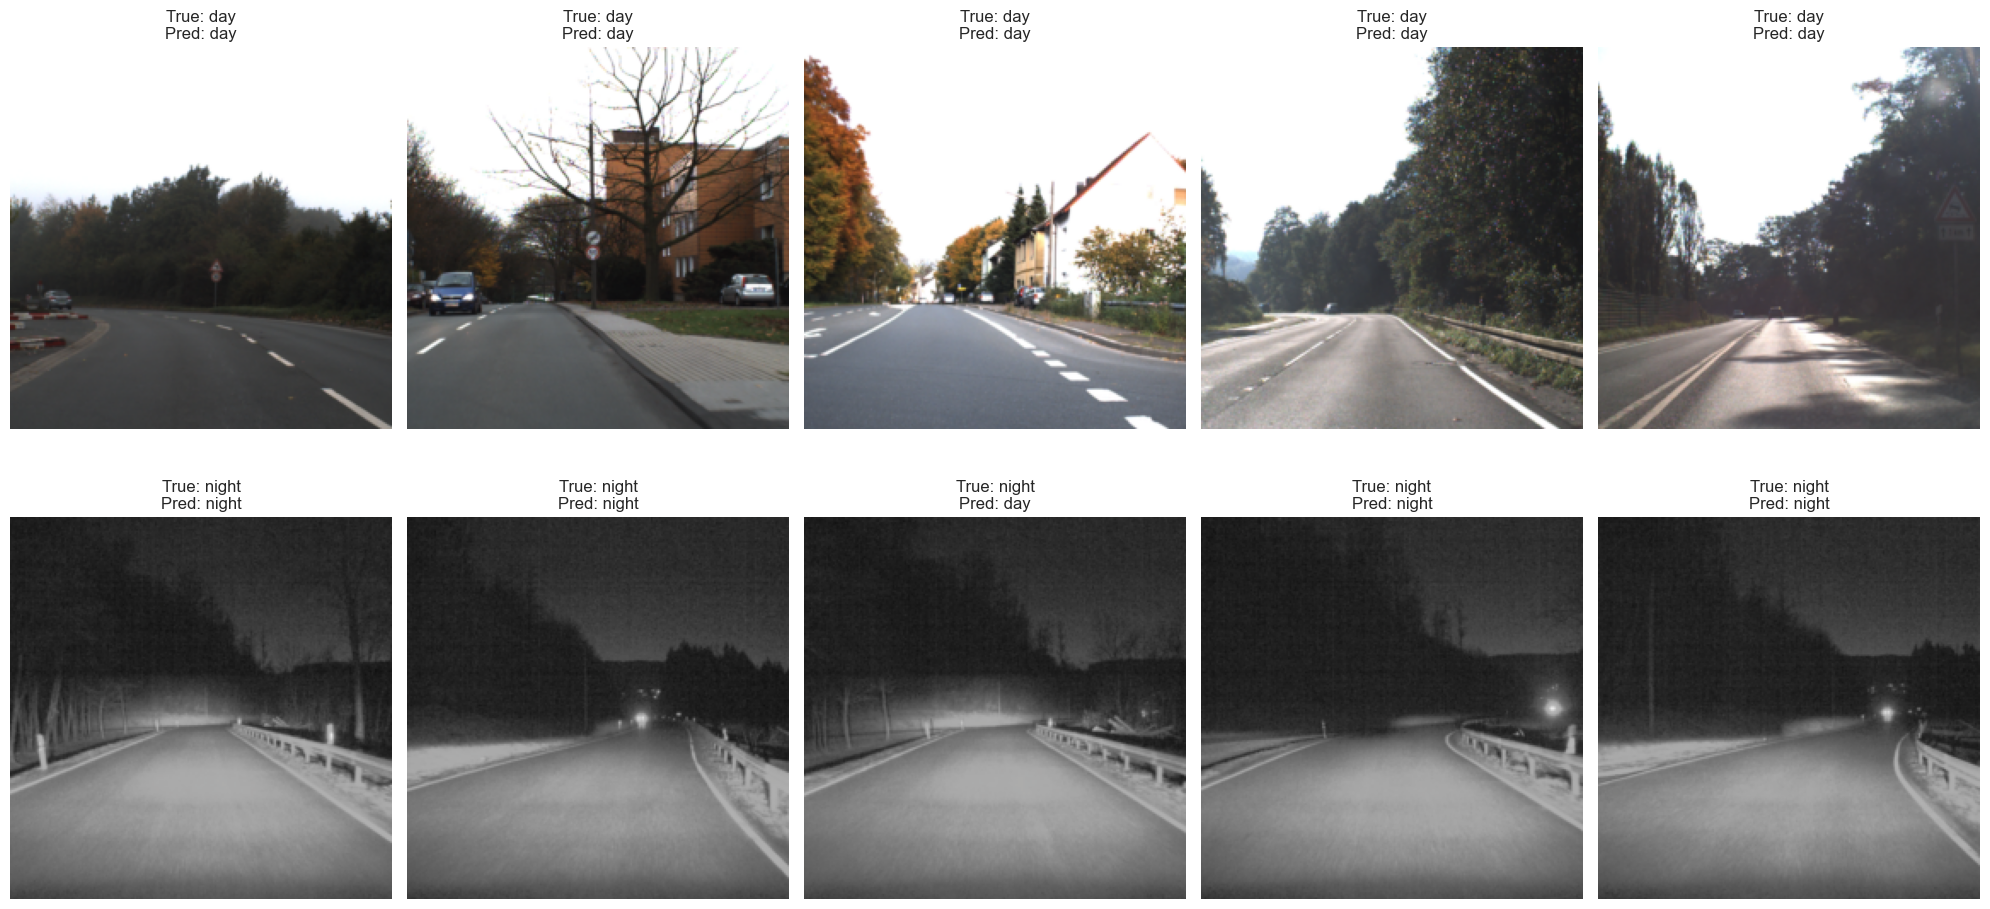

In [13]:
import os
import random
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# ---------------------------
# Device Setup: Use CUDA if available
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---------------------------
# Define Test Transforms
# ---------------------------
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # ImageNet mean
                         std=[0.229, 0.224, 0.225])    # ImageNet std
])

# ---------------------------
# Load the Trained Model
# ---------------------------
model = timm.create_model("efficientnet_b3", pretrained=False, num_classes=2)
model = model.to(device)

# Load saved model weights
model_path = "day_night_classifier_efficientnet_b3.pth"  # Update if needed
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # Set the model to evaluation mode

# ---------------------------
# Evaluate the Model on the Test Dataset
# ---------------------------
criterion = nn.CrossEntropyLoss()
running_loss = 0.0
running_corrects = 0

all_labels = []
all_preds = []

test_bar = tqdm(test_loader, desc="Evaluating", leave=False)
with torch.no_grad():
    for inputs, labels in test_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        
        test_bar.set_postfix(loss=loss.item())

# Calculate overall test loss and accuracy
test_loss = running_loss / len(test_dataset)
test_acc = running_corrects.double() / len(test_dataset)
print(f"\nOverall Test Loss: {test_loss:.4f}  Test Accuracy: {test_acc:.4f}")

# ---------------------------
# Compute and Print Summary Metrics
# ---------------------------
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# ---------------------------
# Test Random Images and Add Predictions
# ---------------------------
def test_random_images(model, folder_paths, num_images=5):
    random_images = []
    labels = []
    class_names = list(folder_paths.keys())
    
    for class_name, folder_path in folder_paths.items():
        # Randomly select images from the folder
        images = os.listdir(folder_path)
        selected_images = random.sample(images, num_images)
        
        for img_name in selected_images:
            img_path = os.path.join(folder_path, img_name)
            random_images.append((img_path, class_name))
            labels.append(class_name)
    
    # Visualize and predict
    plt.figure(figsize=(20, 10))
    for i, (img_path, label) in enumerate(random_images):
        img = Image.open(img_path).convert('RGB')  # Open the image
        transformed_img = test_transforms(img).unsqueeze(0).to(device)  # Apply transforms and add batch dimension
        
        # Predict using the model
        with torch.no_grad():
            output = model(transformed_img)
            _, pred = torch.max(output, 1)
        
        predicted_label = class_names[pred.item()]
        
        # Unnormalize for visualization
        unnormalize = transforms.Normalize(
            mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
            std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
        )
        img_np = np.transpose(unnormalize(test_transforms(img)).numpy(), (1, 2, 0))
        img_np = np.clip(img_np, 0, 1)  # Clip values to valid range
        
        # Plot image
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(img_np)
        plt.title(f"True: {label}\nPred: {predicted_label}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# ---------------------------
# Test Random Images
# ---------------------------
folder_paths = {
    "day": r'C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\day',
    "night": r'C:\Users\janmi\PycharmProjects\Magisterka\.venv\Day_night_detection\dataset\test\night'
}

test_random_images(model, folder_paths, num_images=5)  # Test 5 images from each folder
